In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [25, 5]
sns.set_context("notebook",font_scale=2)


num_chunks = pd.read_csv("C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_numeric.csv",chunksize=100000,  dtype=np.float32)

train_numeric_part = pd.concat([pd.concat([nchunk], axis=1) for nchunk in num_chunks])



#train_date_part = pd.read_csv('C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_date.csv', nrows=100)
#train_numeric_part = pd.read_csv('C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_numeric.csv')
#train_categorical_part = pd.read_csv('C://Users/luisgasco/Documents/bosh_kaggle_comp/data/train_categorical.csv',nrows=100)

#print(train_date_part.shape)
print(train_numeric_part.shape)
#print(train_categorical_part.shape)


(1183747, 970)


How many production lines, stations, and features do we have?

In [3]:
# Get all the feautres (remove Response and Id column)
list_of_features = train_numeric_part.drop(["Response","Id"],axis=1).columns.values
# Divide each string LX_SX_FX in three arrays
prodlines = np.unique([element.split("_")[0] for element in list_of_features])
stations = np.unique([element.split("_")[1] for element in list_of_features])
features = np.unique([element.split("_")[2] for element in list_of_features])

print("There are " + str(prodlines.size) + " lines, with the names " + str(prodlines))
print("There are " + str(stations.size) + " stations, with the names " + str(stations))
print("There are " + str(features.size) + " features")

There are 4 lines, with the names ['L0' 'L1' 'L2' 'L3']
There are 50 stations, with the names ['S0' 'S1' 'S10' 'S11' 'S12' 'S13' 'S14' 'S15' 'S16' 'S17' 'S18' 'S19'
 'S2' 'S20' 'S21' 'S22' 'S23' 'S24' 'S25' 'S26' 'S27' 'S28' 'S29' 'S3'
 'S30' 'S31' 'S32' 'S33' 'S34' 'S35' 'S36' 'S37' 'S38' 'S39' 'S4' 'S40'
 'S41' 'S43' 'S44' 'S45' 'S47' 'S48' 'S49' 'S5' 'S50' 'S51' 'S6' 'S7' 'S8'
 'S9']
There are 968 features


How many elements does the dataset have?

In [4]:
print("The dataset has " + str(train_numeric_part.shape[0]) + " elements (id's)")

The dataset has 1183747 elements (id's)


**Calculate the number of features per station and line:**

In [6]:
# We create dictionaries to add the number of features per line and station
import re
no_line_features = {}
no_station_features = {}
for l in prodlines:
    no_line_features[int(re.sub("[^0-9]", "", l))] =  len([elem for elem in list_of_features if l in elem.split("_")])
            
for s in stations:
    no_station_features[int(re.sub("[^0-9]", "", s))] = len(([elem for elem in list_of_features if s in elem.split("_")]))



print(no_line_features)
print(no_station_features)

{0: 168, 1: 513, 2: 42, 3: 245}
{0: 12, 1: 2, 10: 12, 11: 12, 12: 12, 13: 2, 14: 9, 15: 9, 16: 2, 17: 2, 18: 3, 19: 3, 2: 9, 20: 3, 21: 14, 22: 14, 23: 14, 24: 229, 25: 284, 26: 14, 27: 14, 28: 14, 29: 53, 3: 9, 30: 68, 31: 4, 32: 1, 33: 10, 34: 4, 35: 8, 36: 8, 37: 4, 38: 3, 39: 4, 4: 2, 40: 8, 41: 14, 43: 8, 44: 8, 45: 5, 47: 11, 48: 6, 49: 7, 5: 2, 50: 7, 51: 4, 6: 3, 7: 3, 8: 3, 9: 12}


Plots

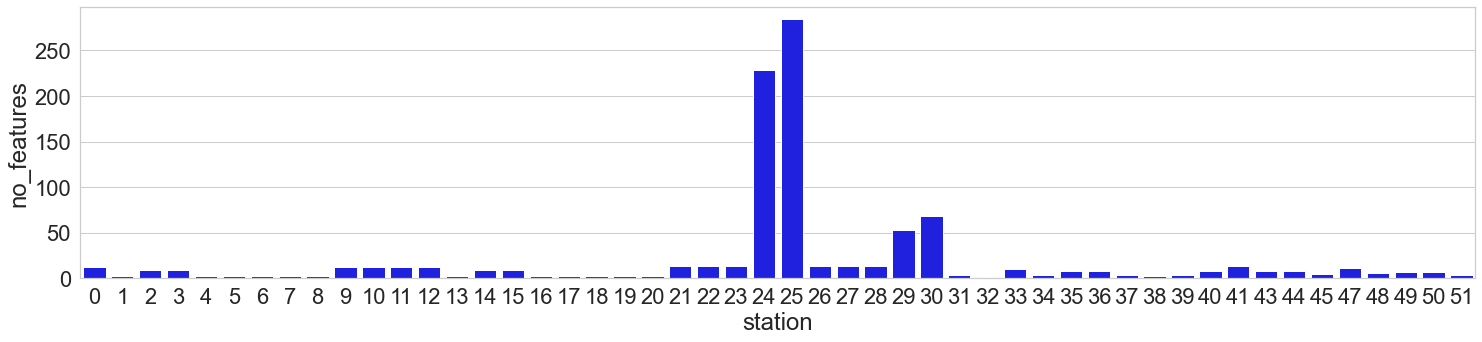

In [7]:
# Order the strings
stations_feat_df = pd.DataFrame.from_dict(no_station_features, orient='index').reset_index()
stations_feat_df.columns=["station","no_features"]

# Plot
plt_station = sns.barplot(x="station", y="no_features", data=stations_feat_df, color="blue")
plt_station


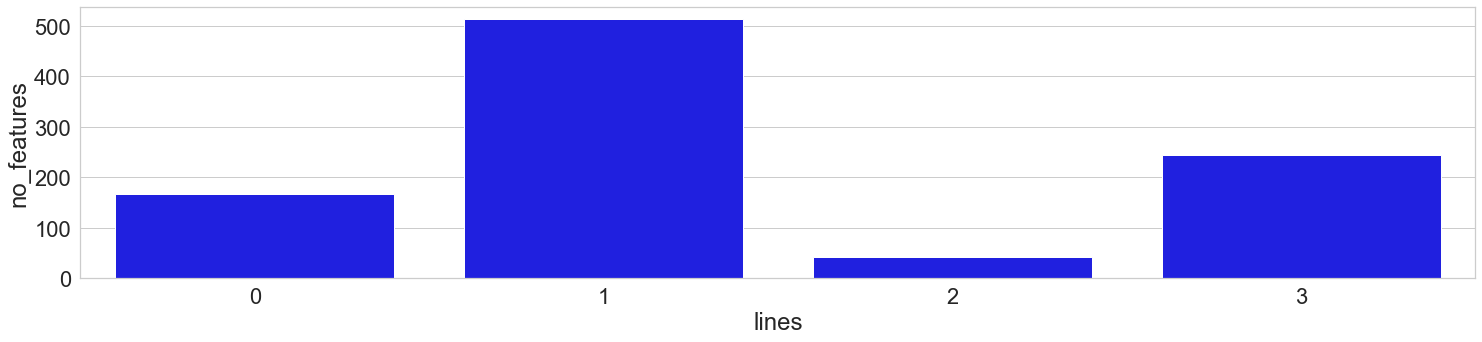

In [8]:
# Order the strings
lines_feat_df = pd.DataFrame.from_dict(no_line_features, orient='index').reset_index()
lines_feat_df.columns=["lines","no_features"]

# Plot
plt_lines = sns.barplot(x="lines", y="no_features", data=lines_feat_df, color="blue")
plt_lines


Vemos que en cada Station el número de características es menor. Ya sea porque son más pequeñas o porque tienen menor sensorización. Ahora habría que ver: **How many elements are detected as positives, fails in each line and station?**

In [234]:
features_id = train_numeric_part.drop(["Id"],axis=1)


In [409]:
# PAsar el código de arriba a un dictionario o dataframe abajo para para cada una de las estaciones y ver fallos relativos en cada estation
dict_stations_id = {}
for s in stations:
    station=[elem for elem in list_of_features if s in elem.split("_")]
    a_column_in_s_is = station[0]
    # Remove NAs.
    df_filtered=features_id[[a_column_in_s_is, 'Response']].dropna(how="any")
    
    total_elements = df_filtered[df_filtered['Response'] == 1].shape[0]  + df_filtered[df_filtered['Response'] == 0].shape[0]
    failed_elements = df_filtered[df_filtered['Response'] == 1].shape[0]
    correct_elements = df_filtered[df_filtered['Response'] == 0].shape[0]
    
    print(int(re.sub("[^0-9]", "", s))) 
    print("No hay 42!! Ni 46!!!! COÑO!")
    # Prepare dictionaray with elements data for each station
    dict_stations_id[int(re.sub("[^0-9]", "", s))] = {"perc_f_elements": 100*failed_elements/total_elements ,
                                                       "perc_c_elements": 100*correct_elements/total_elements, 
                                                       "num_f_elements": failed_elements,
                                                       "num_c_elements": correct_elements, 
                                                       "total_elements": total_elements}



0
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
43
44
45
47
48
49
5
50
51
6
7
8
9


In [322]:
sations_elemen_df = pd.DataFrame.from_dict(dict_stations_id, orient='index').reset_index()
sations_elemen_df.head(1)


,index,perc_f_elements,perc_c_elements,num_f_elements,num_c_elements,total_elements
0,0,0.535421,99.464579,3608,670254,673862


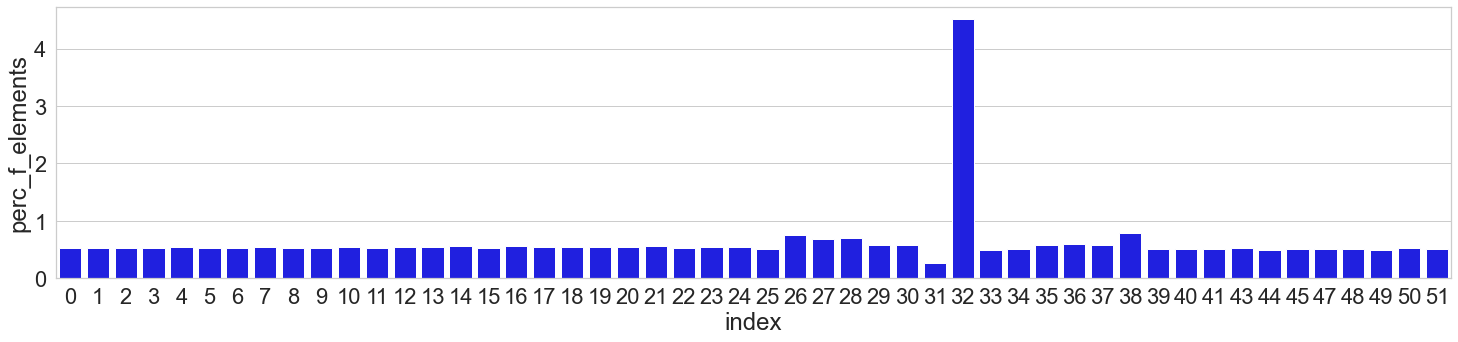

In [324]:
plt_station = sns.barplot(x="index", y="perc_f_elements", data=sations_elemen_df, color="blue")
plt_station

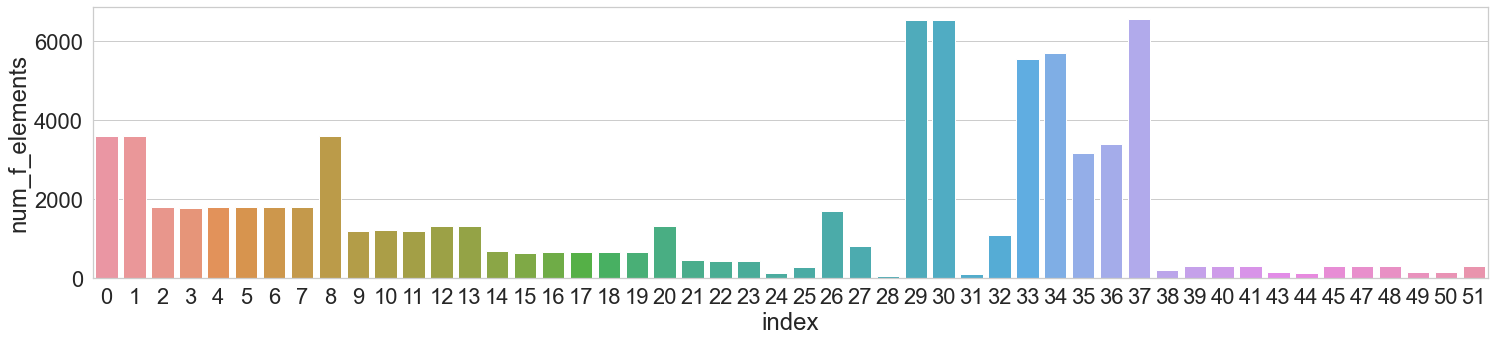

In [326]:
sns.barplot(x="index", y="num_f_elements", data=sations_elemen_df)

In [408]:
from bokeh.io import show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models.tools import HoverTool

output_notebook()

# NOT NEEDED source = ColumnDataSource(data=asd.to_dict('list'))

TOOLTIPS = [
    ("station","@index"),
    ("failed products", "@num_f_elements"),
    ("correct products", "@num_c_elements"),
    ("total products", "@total_elements")
]


p = figure(plot_width=800, plot_height=400, tooltips=TOOLTIPS)
p.vbar(x="index",top="total_elements", width=0.9, source=sations_elemen_df)

show(p)

Loading BokehJS ...

In [ ]:
# Create a function/cell that: 
# - put all the data about number of correct items.
# - put the number of features too, to compare it.
# Create plots to show the data after. 
# Explore the NAs:
# - Number of rows(elements) with NAs (si son todas, checkear por qué)


Then, we need to check the presence of NaNs in each feature, to see if the presence of these NAs are related to problems with measurements or to the data structure (something possible).